In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [24]:
boston_df = pd.read_csv('BostonHousing.csv')

In [25]:
boston_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [27]:
test_ratio = 0.3
shuffled_indices = np.random.permutation(len(boston_df))
test_set_size = int(len(boston_df)*test_ratio)

test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

train_df = boston_df.iloc[train_indices]
test_df = boston_df.iloc[test_indices]


In [29]:
# Gerando dados de treinamento e teste

# tenho x e quero predizer y
X_train = np.array(train_df["rm"])
Y_train = np.array(train_df["medv"])

X_test = np.array(test_df["rm"])
Y_test = np.array(test_df["medv"])

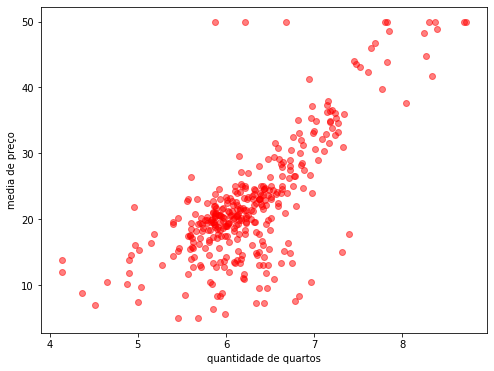

In [34]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, c='red', alpha=0.5)
plt.xlabel("quantidade de quartos")
plt.ylabel("media de preço")
plt.show()

O problema agora é que dado o gráfico, eu quero uma reta que melhor descreve a relação entre o <b>atributo preditor</b> rm(quantidade de quartos) e medv(media de preço)

<b>Hipótese: Reta

medv = theta0 + theta1 * rm</b>

Como fazer isso? Como estimar theta0 e theta1? 

Primeiro ponto da reta: (8, 43)

Segundo ponto da reta: (4, 0)

theta0 + theta1 * rm = medv

1*theta0 + theta1 * 8 = 43

1*theta0 + theta1 * 4 = 0

In [35]:
A = np.array([[1,8], [1,4]])
B = np.array([43,0])

inv_A = np.linalg.inv(A) # Calcula a inversa de A
theta = inv_A.dot(B) # multiplica a inversa de A por B

In [37]:
rm = np.arange(4,9, 0.5)
y= theta[0]+theta[1]*rm

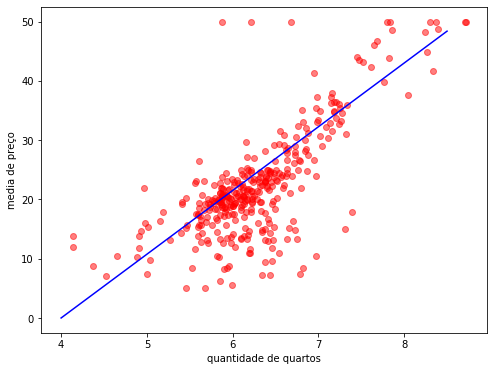

In [39]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, c='red', alpha=0.5)
plt.plot(rm, y,c="blue")
plt.xlabel("quantidade de quartos")
plt.ylabel("media de preço")
plt.show()

In [ ]:
# Calcular função de custo